### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

### Load Data

In [2]:
df = pd.read_csv("Customer Data.csv")
display(df.columns)
display(df.head())
display(df.info())
display(df.isnull().sum())
display(df.shape)

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

None

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

(8950, 18)

### Null value imputation

<p> It is clearly seen that "MINIMUM_PAYMENTS" column has 313 null value.  </p>
<p> We are implementing mean value of "MINIMUM_PAYMENTS" for replacing null values </p>

In [3]:
# filling mean value
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
display(df.isnull().sum())
display(df.shape)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

(8950, 18)

In [4]:
#Check duplicates
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [5]:
# dropping unnecessary columns
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

* KDE plot for visualizing the distribution in dataset

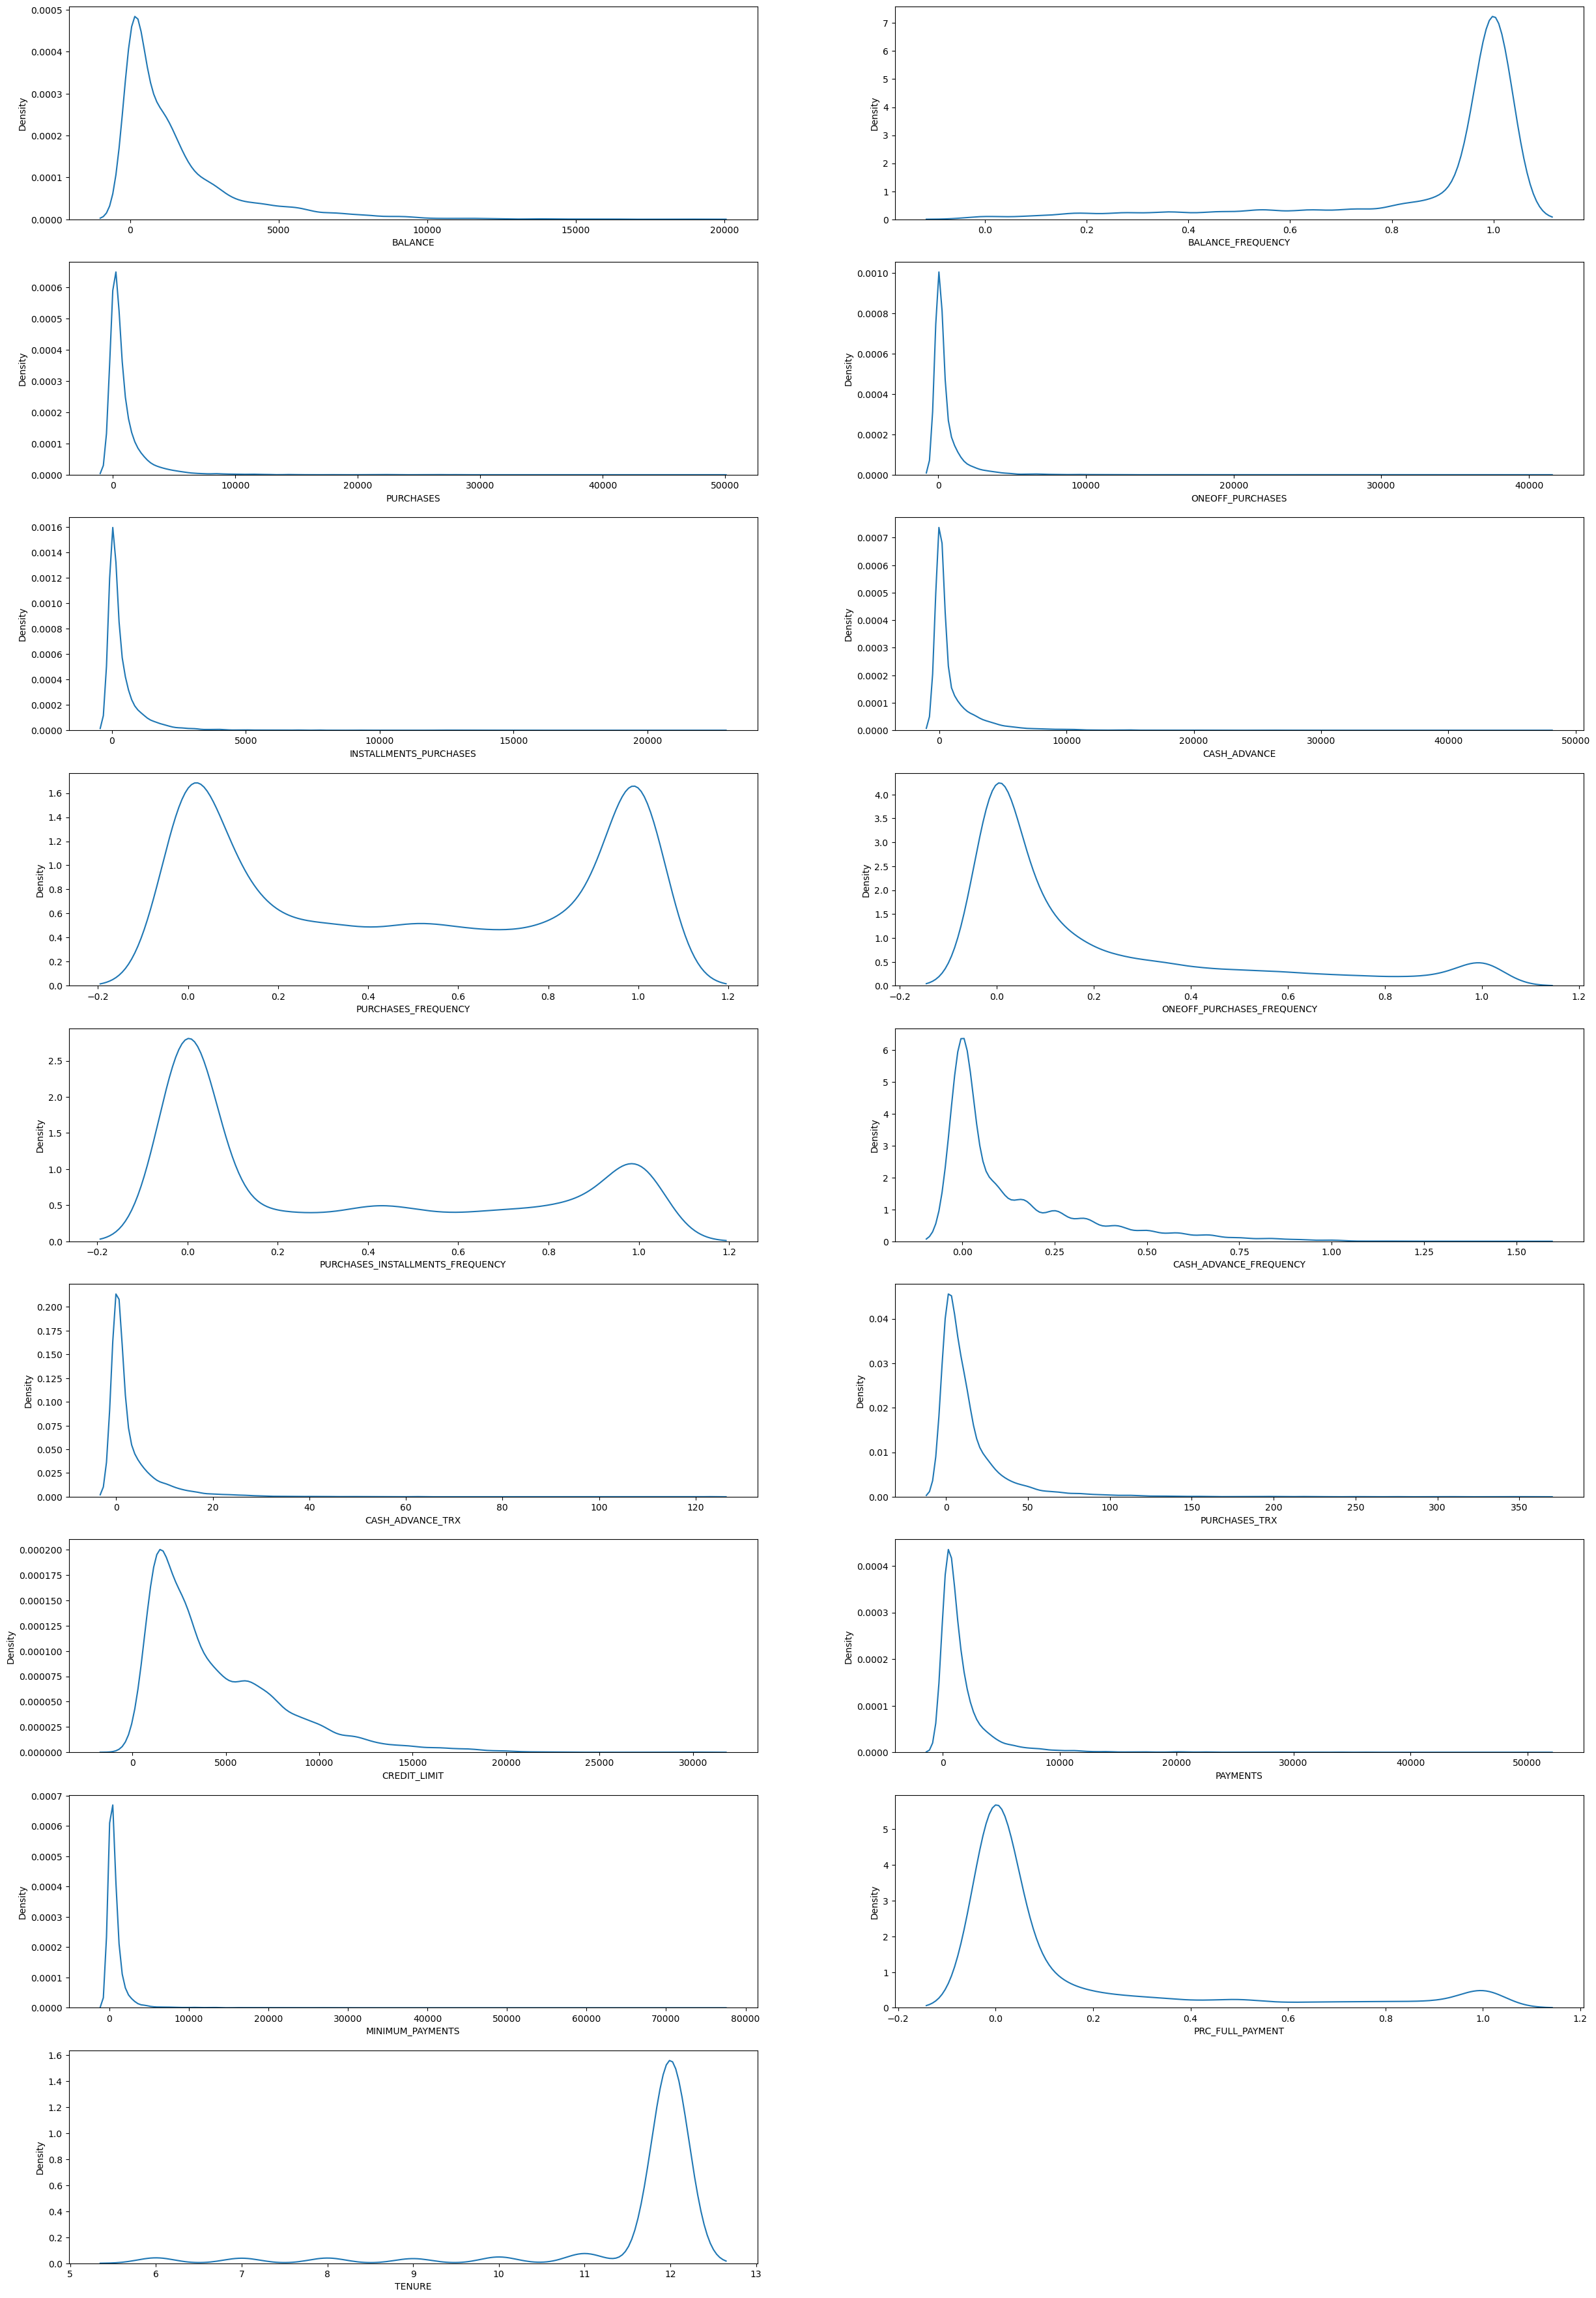

In [6]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

* High correlation

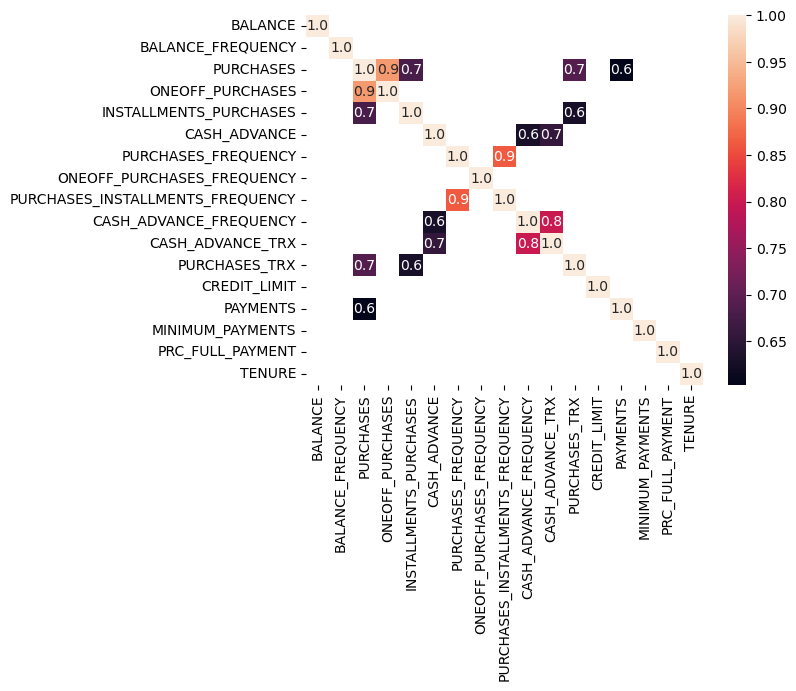

In [7]:
# plt.figure(figsize=(12,12))
# sns.heatmap(df.corr(), annot=True, fmt=".1f")
# plt.show()


# Create a mask to show only correlations greater than 0.7 or less than -0.7
mask = (df.corr() > 0.6) | (df.corr() < -0.6)
sns.heatmap(df.corr(), annot=True, fmt=".1f", mask=~mask)
plt.show()

### Scaling the DataFrame

In [8]:
scaled_df = scalar.fit_transform(df)

### Dimension reduction

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df.head()

,PCA1,PCA2
0,-1.682220,-1.076457
1,-1.138294,2.506461
2,0.969679,-0.383516
3,-0.873627,0.043159
4,-1.599434,-0.688585


### Hyper parameter tuning
* K-Means

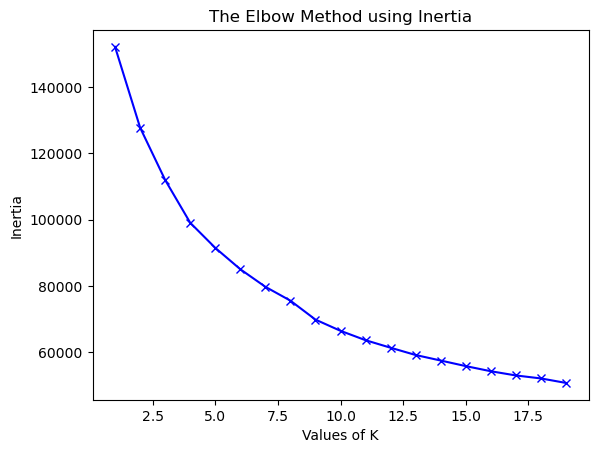

In [10]:
inertia = []
range_val = range(1,20)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

### Model Building using KMeans

In [11]:
# Taking value as 5 becaus, after 5, the elbow has started to curve

kmeans_model=KMeans(5)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

### Visualizing the clustered dataframe

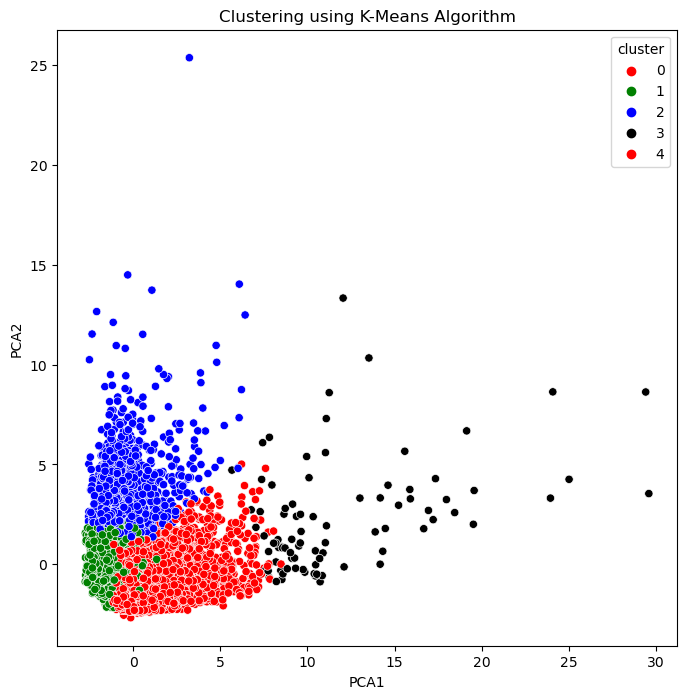

In [12]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()


In [13]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,645.364672,0.902139,796.946942,166.182051,631.259412,178.170342,0.856615,0.083091,0.794395,0.038063,0.709905,16.639039,3199.049446,934.083755,679.125921,0.271751,11.454621
1,1055.782527,0.797277,278.701719,225.597146,53.306480,621.426219,0.163313,0.096803,0.065771,0.118988,2.213466,2.951798,3346.700956,1005.956760,600.575314,0.070492,11.455241
2,4622.768927,0.967852,494.933109,303.183397,191.838507,4641.104906,0.281434,0.130960,0.182778,0.491942,14.698690,7.393013,7558.693926,3606.372749,2010.529530,0.036109,11.379913
3,4523.752507,0.976907,15703.583218,10624.771724,5078.811494,1048.004595,0.928927,0.764855,0.784013,0.084291,2.954023,129.885057,12435.632184,15483.769000,3351.833958,0.390184,11.965517
4,1891.925271,0.979339,2911.814090,1983.562601,928.685014,353.408743,0.923567,0.733701,0.584869,0.058192,1.154624,43.471098,6970.373752,2772.364320,829.043377,0.266129,11.888006


In [14]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
display(cluster_df.head())
display(cluster_df['Cluster'].unique())
display(cluster_df.shape)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


array([1, 2, 4, 0, 3])

(8950, 18)

<Axes: xlabel='Cluster', ylabel='count'>

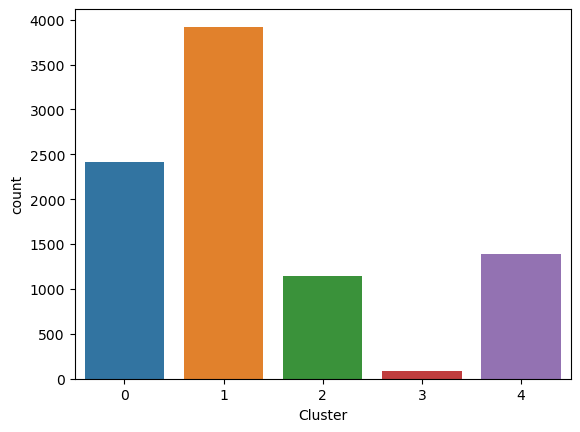

In [15]:
#Visualization of components in different Cluster
sns.countplot(x='Cluster', data=cluster_df)


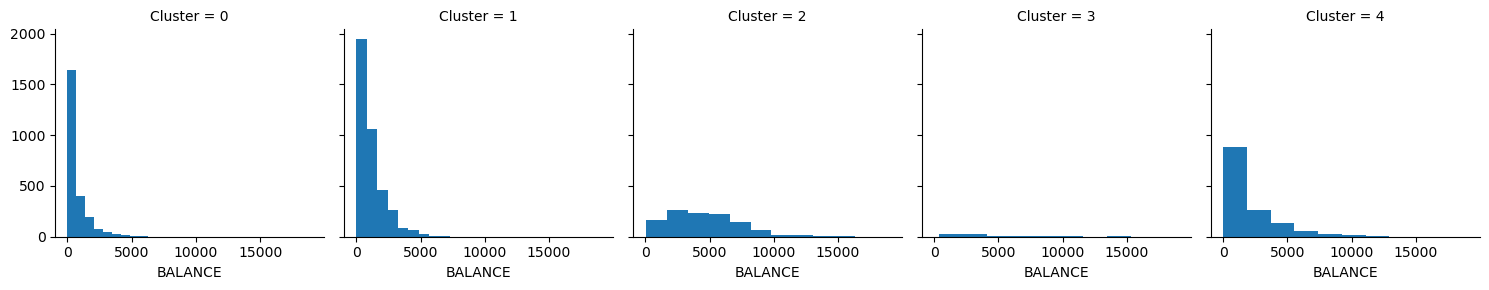

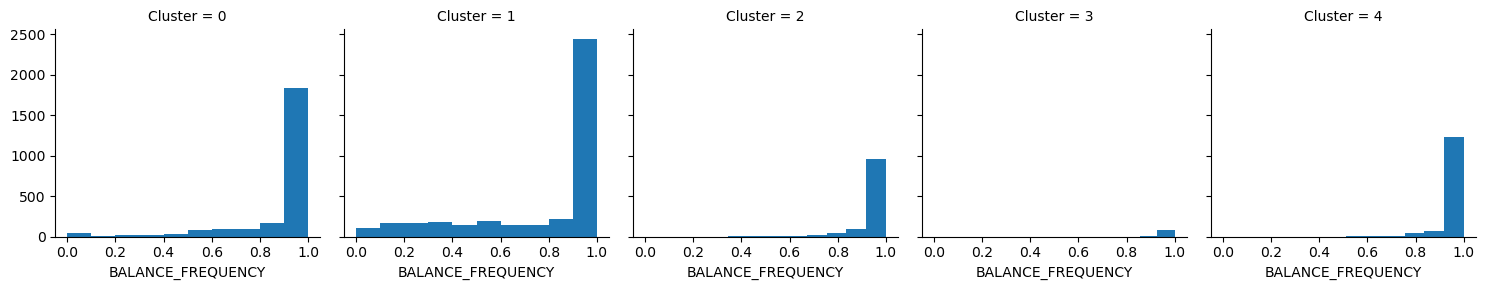

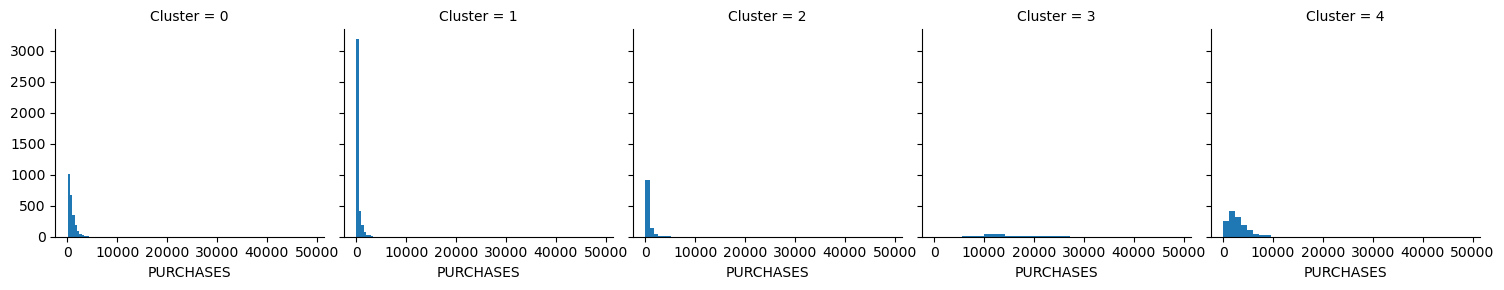

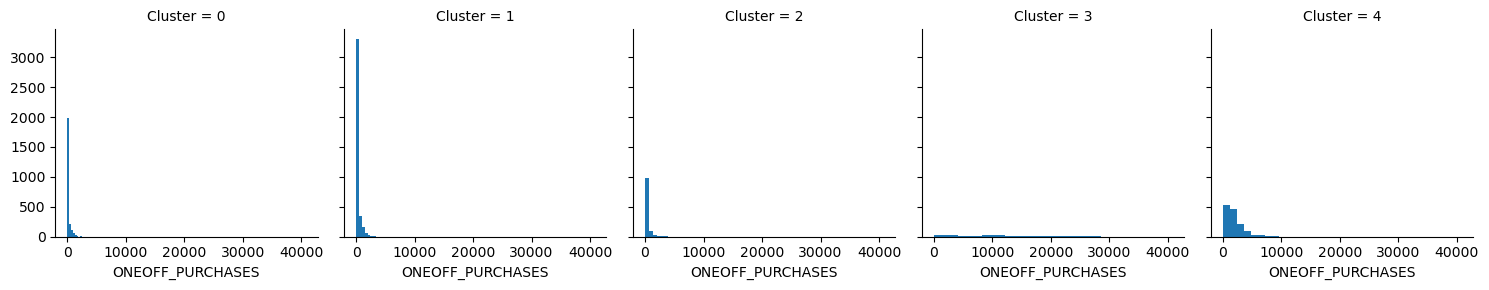

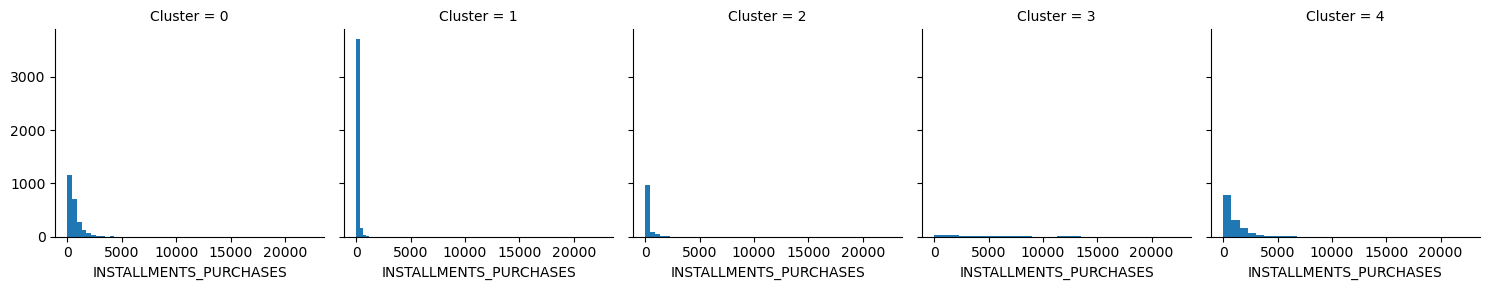

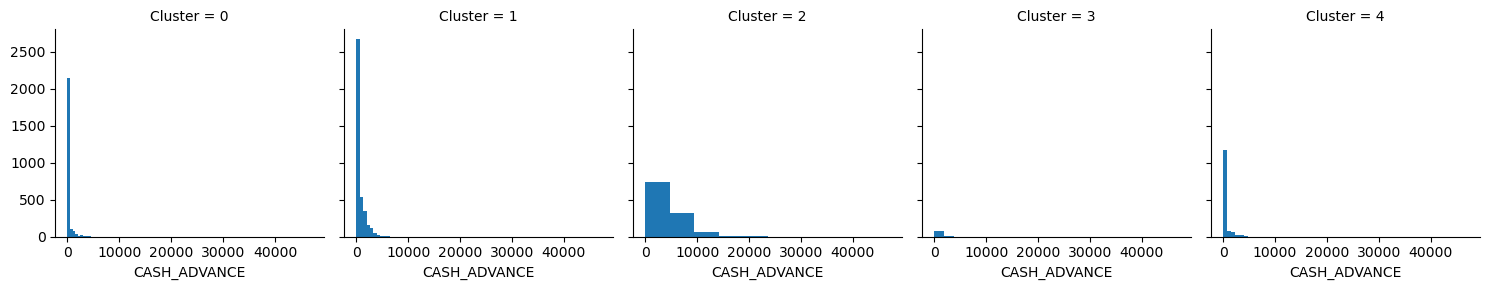

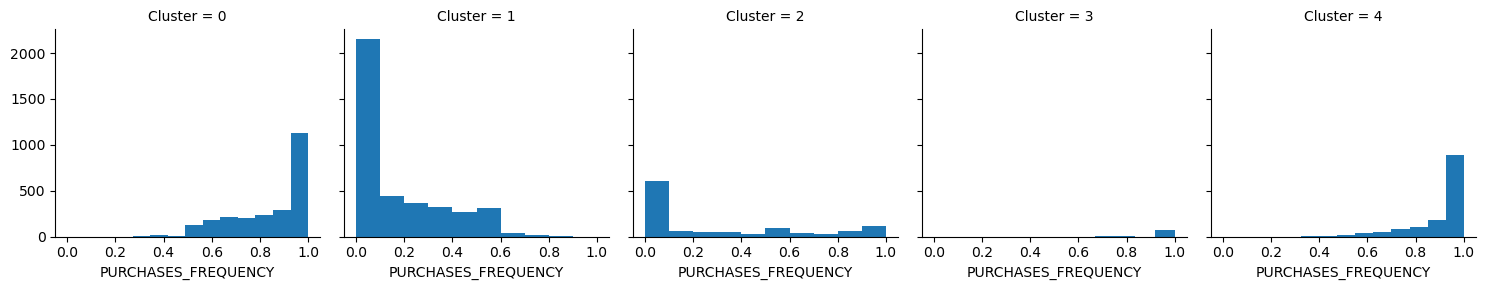

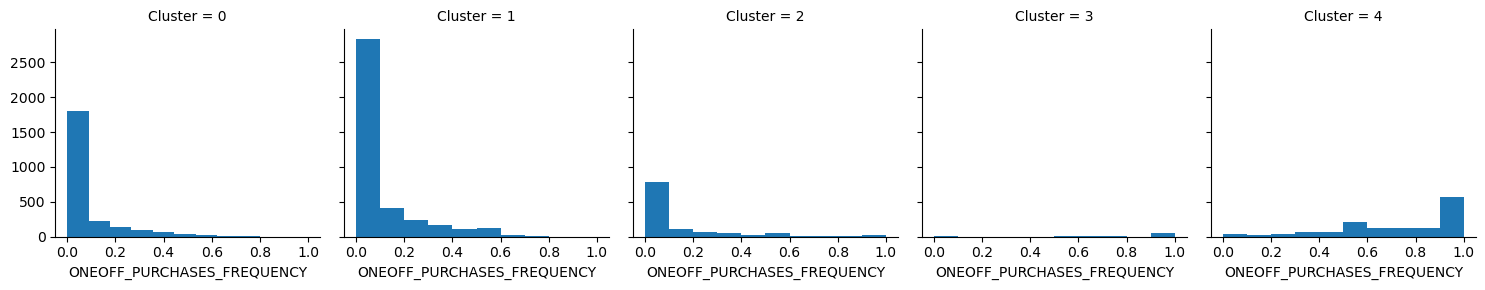

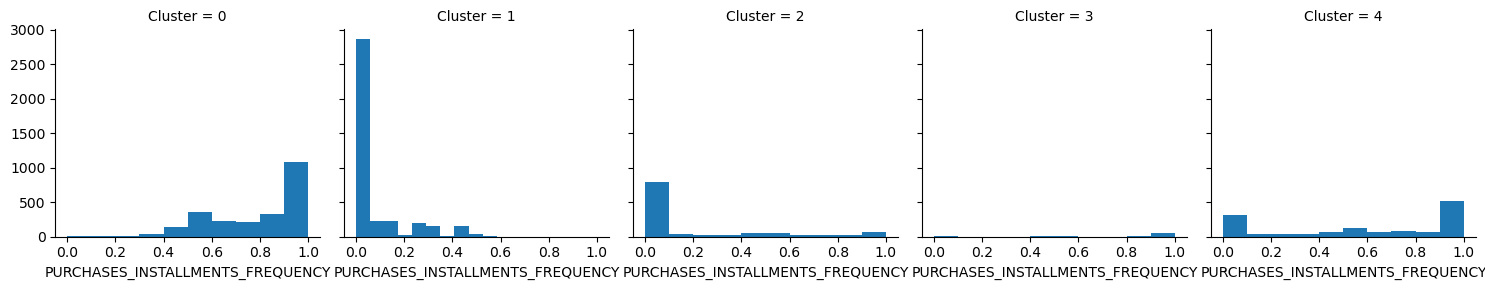

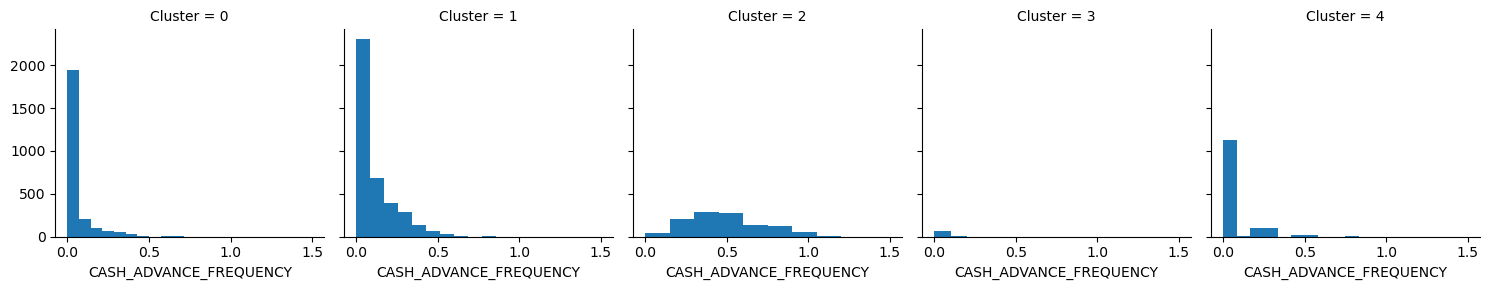

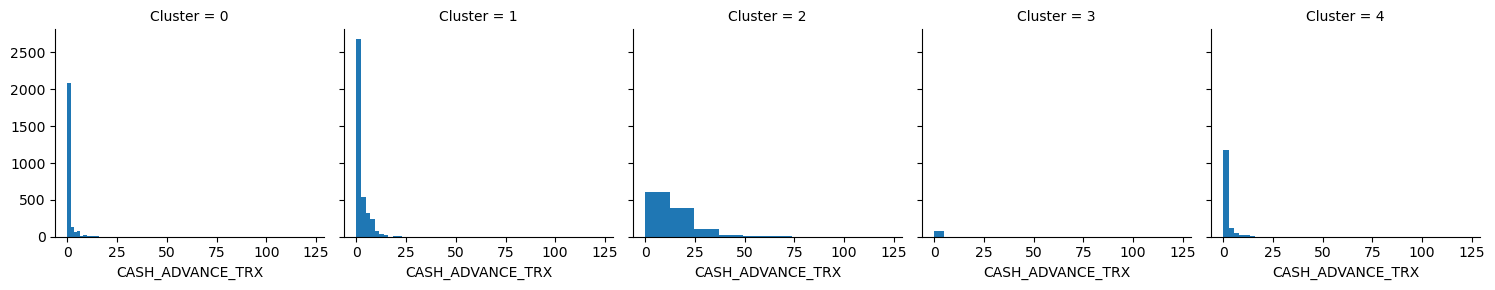

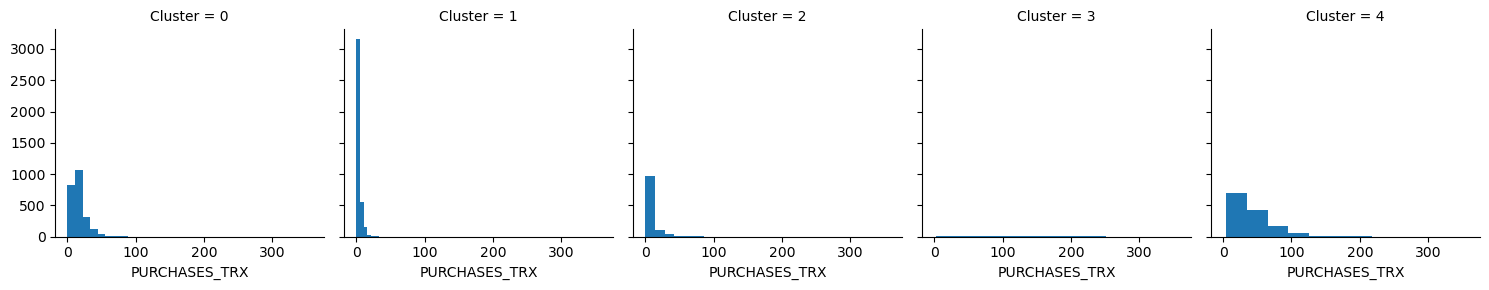

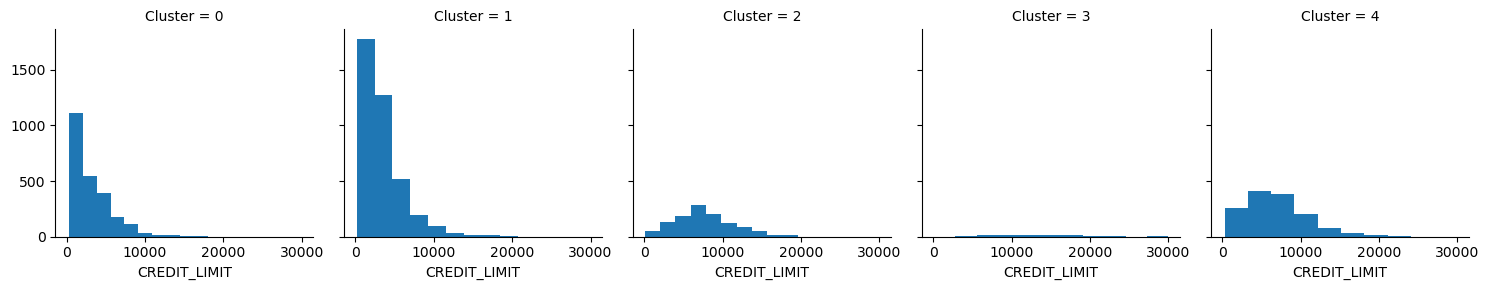

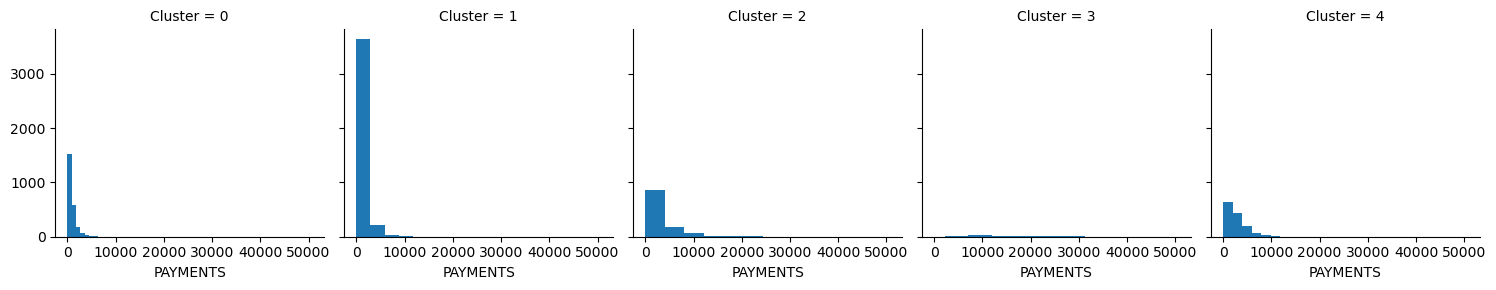

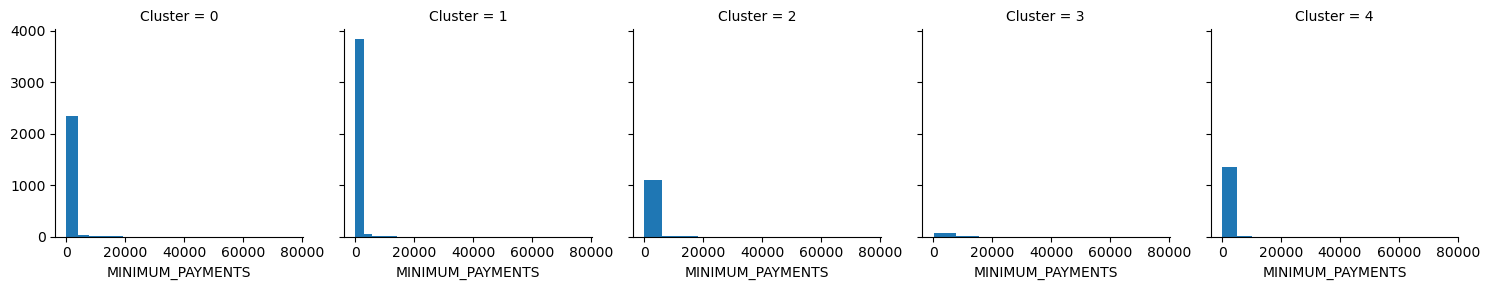

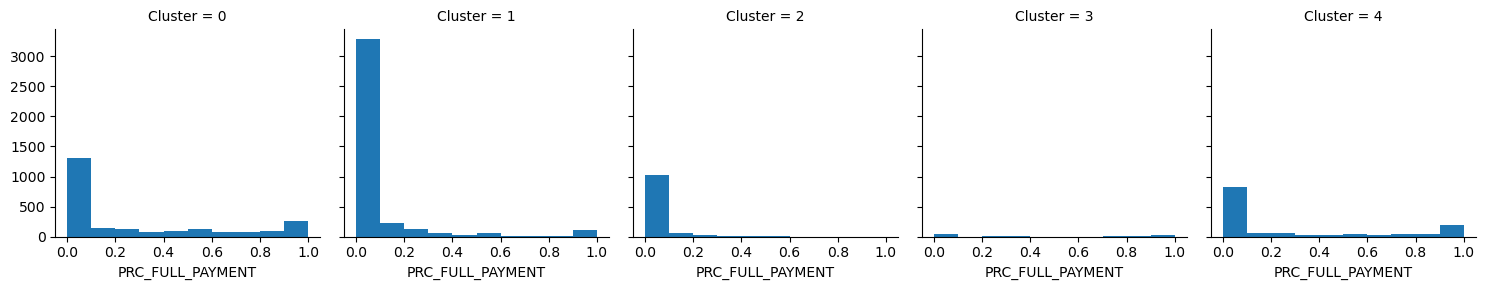

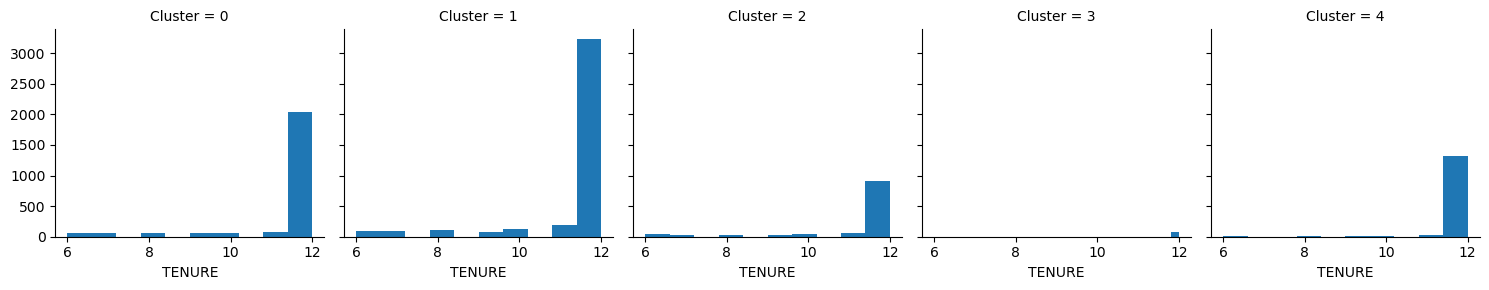

In [16]:

for i in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, i)
plt.show()

### Saving the kmeans clustering model and the data with cluster label

In [17]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

In [18]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

### Training and Testing the model accuracy using decision tree

In [19]:
#Split Dataset
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)


In [20]:
display(X_test.head())
display(X_test.shape)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6012,3249.347926,1.000000,438.12,59.20,378.92,2195.21579,1.000000,0.083333,1.000000,0.416667,6,27,5000.0,1021.827215,744.223511,0.000,12
5009,41.049799,0.727273,413.31,133.31,280.00,0.00000,0.583333,0.083333,0.416667,0.000000,0,8,6000.0,475.939508,106.476161,0.625,12
378,241.223955,0.909091,180.91,180.91,0.00,0.00000,0.166667,0.166667,0.000000,0.000000,0,6,1400.0,802.858576,220.455533,0.000,12
6662,160.492501,1.000000,897.45,897.45,0.00,0.00000,0.666667,0.666667,0.000000,0.000000,0,13,1200.0,606.996033,56.918917,0.000,6
3154,1562.698176,1.000000,354.04,354.04,0.00,0.00000,0.916667,0.916667,0.000000,0.000000,0,16,6000.0,2975.946627,392.783086,0.000,12


(2685, 17)

In [21]:
#Decision_Tree
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 659   17   10    0   22]
 [  16 1093   31    0   13]
 [   6   31  297    0   16]
 [   0    0    1   22    2]
 [  23   14    5    3  404]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       708
           1       0.95      0.95      0.95      1153
           2       0.86      0.85      0.86       350
           3       0.88      0.88      0.88        25
           4       0.88      0.90      0.89       449

    accuracy                           0.92      2685
   macro avg       0.90      0.90      0.90      2685
weighted avg       0.92      0.92      0.92      2685



### Saving the Decision tree model for future prediction

In [23]:
import pickle
filename = 'final_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9217877094972067 % Acuuracy
